# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_61710/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

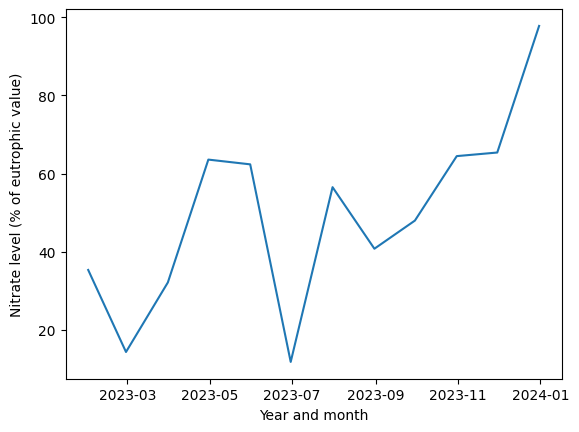

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_61710/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

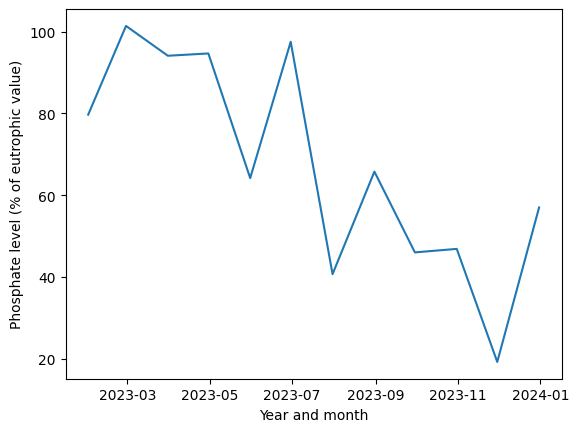

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

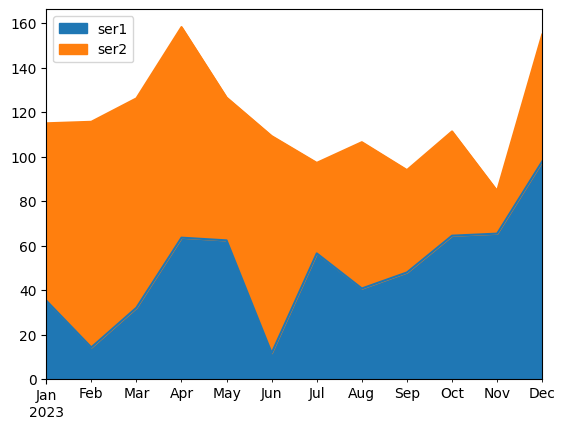

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ren_energy = pd.read_csv("IRENA_RenewableEnergy_Statistics_2000-2022.csv", encoding='latin-1')

# Check the basic information of the dataset
print(ren_energy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35193 entries, 0 to 35192
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               35193 non-null  object 
 1   Sub-region                           35193 non-null  object 
 2   Country                              35193 non-null  object 
 3   ISO3 code                            35193 non-null  object 
 4   M49 code                             35193 non-null  int64  
 5   RE or Non-RE                         35193 non-null  object 
 6   Group Technology                     35193 non-null  object 
 7   Technology                           35193 non-null  object 
 8   Producer Type                        35193 non-null  object 
 9   Year                                 35193 non-null  int64  
 10  Electricity Generation (GWh)         35193 non-null  float64
 11  Electricity Installed Capaci

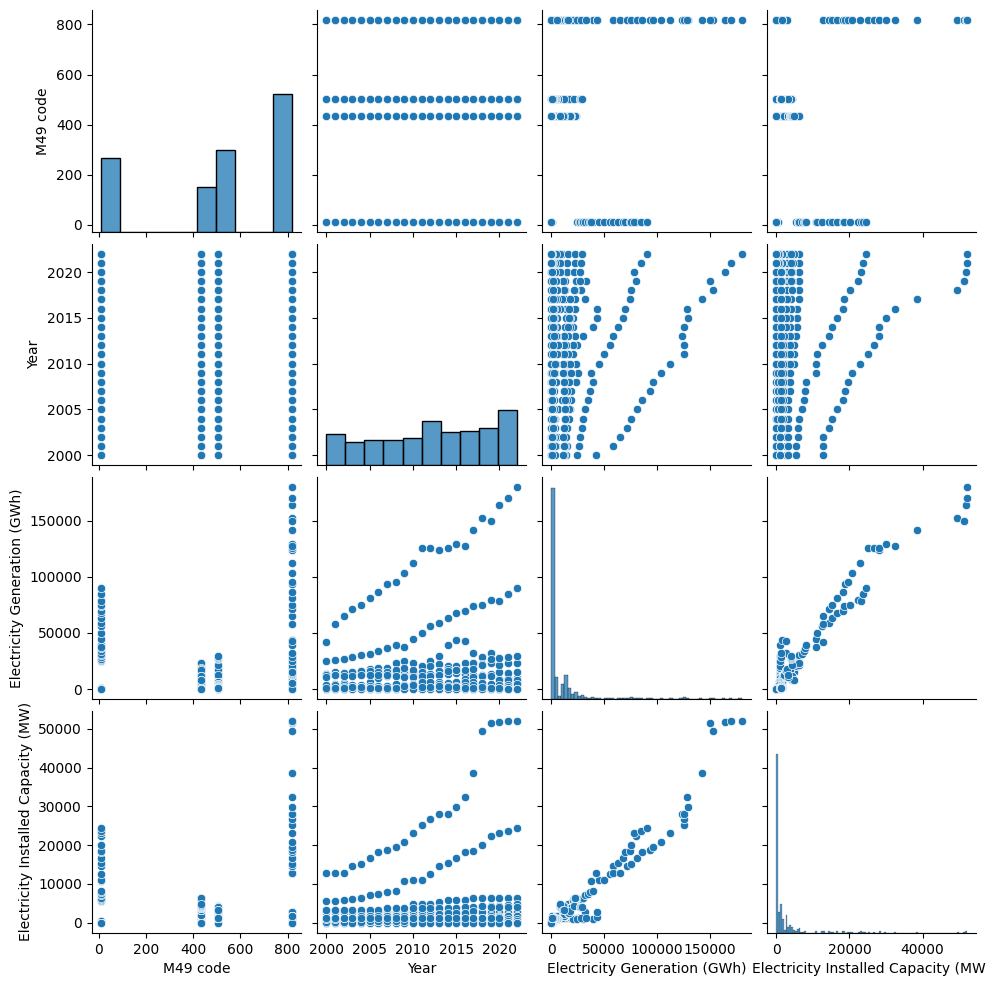

In [6]:
#only include numeric columns

ren_energy_num = ren_energy.select_dtypes(include=['number'])

sample_ren = ren_energy_num.head(500)

sns.pairplot(sample_ren)

In [7]:
print("Correlations:", ren_energy_num.corr())

Correlations:                                      M49 code      Year  \
M49 code                             1.000000  0.006546   
Year                                 0.006546  1.000000   
Electricity Generation (GWh)         0.016382 -0.000913   
Electricity Installed Capacity (MW)  0.011128  0.012387   

                                     Electricity Generation (GWh)  \
M49 code                                                 0.016382   
Year                                                    -0.000913   
Electricity Generation (GWh)                             1.000000   
Electricity Installed Capacity (MW)                      0.958447   

                                     Electricity Installed Capacity (MW)  
M49 code                                                        0.011128  
Year                                                            0.012387  
Electricity Generation (GWh)                                    0.958447  
Electricity Installed Capacity (MW)         

There is strong positive correlation between electricity installed capacity and electricity generation. 

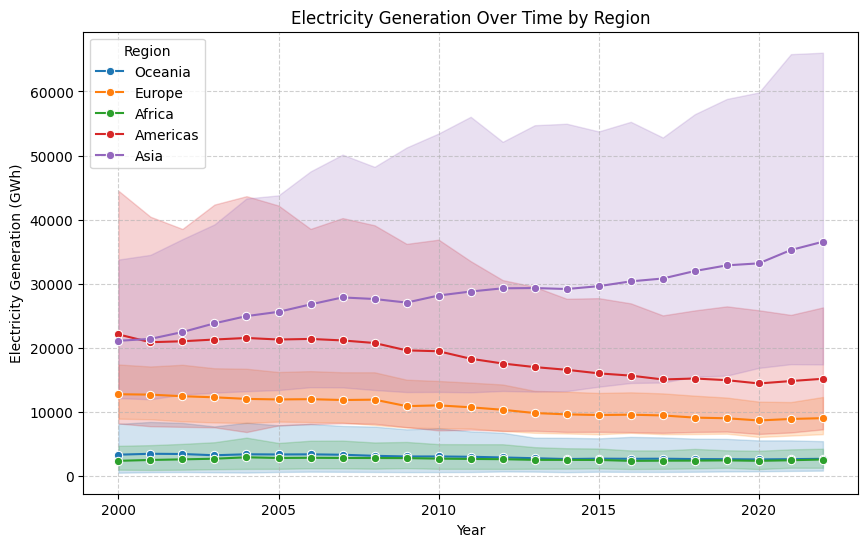

In [22]:
ren_col = ren_energy[['Region', 'Year', 'Electricity Generation (GWh)']]

# Sort values by Year for proper plotting
ren_col = ren_col.sort_values(by='Year')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=ren_col, x='Year', y='Electricity Generation (GWh)', hue='Region', marker='o')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Electricity Generation (GWh)")
plt.title("Electricity Generation Over Time by Region")
plt.legend(title="Region")
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


There is a clear trend of electricity generation in Asia region over last couple decades. Electricity installed capacity and electricity generation are highly correlated to the point that it's not valuable here because we can safely assume high electricty installation is related to higher electricity generation. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_1921/3747161326.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electricity Installed Capacity (MW)', y='Region', data=ren_col2, palette=colors)
/tmp/ipykernel_1921/3747161326.py:11: UserWarning: The palette list has more values (35193) than needed (5), which may not be intended.
  sns.barplot(x='Electricity Installed Capacity (MW)', y='Region', data=ren_col2, palette=colors)


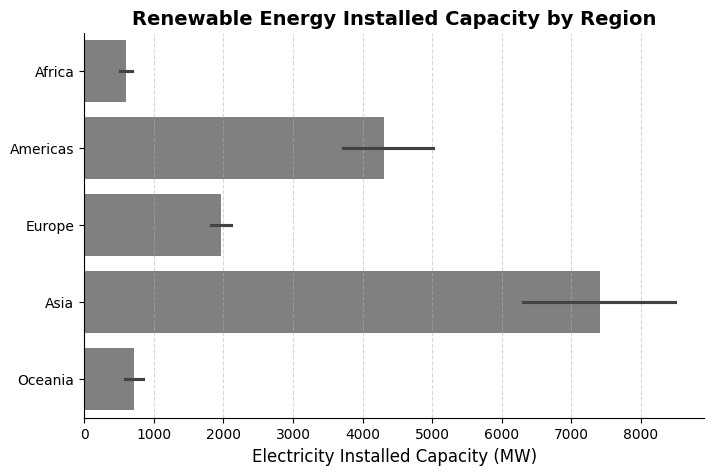

In [27]:
ren_col2 = ren_energy[['Region', 'Year', 'Electricity Installed Capacity (MW)']]

# Sort data by capacity
ren_col2 = ren_col2.sort_values(by='Electricity Installed Capacity (MW)', ascending=True)

# Define colors (highlight highest value)
colors = ['gray' if x < ren_col2['Electricity Installed Capacity (MW)'].max() else 'blue' for x in ren_col2['Electricity Installed Capacity (MW)']]

# Create the horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Electricity Installed Capacity (MW)', y='Region', data=ren_col2, palette=colors)

# Add labels and title
plt.xlabel("Electricity Installed Capacity (MW)", fontsize=12)
plt.ylabel("")
plt.title("Renewable Energy Installed Capacity by Region", fontsize=14, fontweight='bold')

# Remove unnecessary chart elements (decluttering)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show the plot
plt.show()